<a id="top"></a>
# Query a region, plot an HR diagram, and select a light curve: Solutions
***

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u

from astroquery.mast import Catalogs
from astroquery.mast import Observations

import bokeh
from bokeh.models.tools import *
from bokeh.plotting import *

import lightkurve as lk

%matplotlib inline

## Exercise 1: 

What percentage of the returned results have...  
a) ...distance measurements included in the TIC?  
b) ...measurements for ``gaiabp`` *and* ``gaiarp``?   
c) ... measurements for ``Bmag`` *and* ``Vmag``?   

In [2]:
# First, we need to recreate some of the variables from the original notebook here in the solutions notebook.
# select a region of the sky to query
ra = 180.
dec = +30.
radius=1*u.degree
coord = SkyCoord(ra, dec, unit="deg")
catalog_data = Catalogs.query_region(coord, radius=radius, catalog="Tic")

In [3]:
# Solution:
n=len(catalog_data)
print('Total length: ',n)
print('Percentage with non-nan d:',np.sum(~np.isnan(catalog_data['d']))/n*100)
print('Percentage with gaiabp and gaiarp:',np.sum(~np.isnan(catalog_data['gaiabp']) & ~np.isnan(catalog_data['gaiarp']))/n*100)
print('Percentage with Bmag and Vmag:',np.sum(~np.isnan(catalog_data['Bmag']) & ~np.isnan(catalog_data['Vmag']))/n*100)

Total length:  8774
Percentage with non-nan d: 67.15295190335081
Percentage with gaiabp and gaiarp: 70.86847503989058
Percentage with Bmag and Vmag: 28.037383177570092


## Exercise 2
Using the hover tool, what are the TIC identifiers numbers of stars at the following locations?  
a) (Gb-Gr,G) = (0.865, 0.459)  
b) (Gb-Gr,G) = (1.691, 7.024)  
c) (Gb-Gr,G) = (-0.0288,11.869)  
Confirm your choices by checking the catalog.
Based on their locations in the HR diagram, what type of stars are each of these likely to be?
If you wanted to search for exoplanets orbiting stars, which of the three stars would you investigate further?
If you wanted to examine stellar variability, which of the three stars would you investigate further? 

In [4]:
# First, we need to recreate some of the variables from the original notebook here in the solutions notebook.
catalog_data = catalog_data[(catalog_data['d'] > 0) & (catalog_data['e_d'] / catalog_data['d'] < 0.1)]
catalog_data['abs_gaia'] = catalog_data['GAIAmag'] - 5 * np.log10(catalog_data['d'] / 10)
catalog_data['color'] = catalog_data['gaiabp'] - catalog_data['gaiarp']
catalog_data=catalog_data[~np.isnan(catalog_data['color'])]
catalog_data=catalog_data[~np.isnan(catalog_data['abs_gaia'])]

In [5]:
# Solution:
# Based on hovering, the TIC ID's are: a) 138898766, b) 173091222, c) 903745613
print(catalog_data[catalog_data['ID']=='138898766']['ID','color','abs_gaia','lumclass','Teff'])
print(catalog_data[catalog_data['ID']=='173091222']['ID','color','abs_gaia','lumclass','Teff'])
print(catalog_data[catalog_data['ID']=='903745613']['ID','color','abs_gaia','lumclass','Teff'])
# The first star is a giant, the second is on the main sequence, and the third is likely a stellar remnant (white dwarf).
# The star on the main sequence is the best one to investigate for exoplanets.
# The giant star is the best one to investigate for variability, as it is likely on the instability strip.

    ID          color             abs_gaia     lumclass  Teff 
--------- ------------------ ----------------- -------- ------
138898766 0.8646000000000011 0.459238477818106    GIANT 5717.0
    ID          color             abs_gaia      lumclass  Teff 
--------- ------------------ ------------------ -------- ------
173091222 1.6906000000000017 7.0242717177156955    DWARF 3932.4
    ID           color              abs_gaia      lumclass Teff
--------- -------------------- ------------------ -------- ----
903745613 -0.02880000000000038 11.869260443380862    DWARF  nan


## Exercise 3

Determine how many rows in `catalog_data` have lightcurves available in the MAST archive. This can take a while! To speed up the process, just focus on those targets that have absolute G magnitude < 6. (Keep in mind, we can also create new [lightcurves from target pixel files](https://docs.lightkurve.org/tutorials/1-getting-started/plotting-target-pixel-files.html).)

In [8]:
# Focus on those with `abs_gaia` < 8
cat2=catalog_data[catalog_data['abs_gaia']<6]
print('Focusing on ',len(cat2),' instead of full ',len(catalog_data))
cat2['HasLC']=False
# For my purposes... how many have LC's
for i,row in enumerate(cat2):
    search_result=lk.search_lightcurve('TIC '+str(row['ID']))
    if len(search_result)>0:
        cat2['HasLC'][i]=True
print(np.sum(cat2['HasLC']),' rows have a lightcurve')

Focusing on  443  instead of full  1029


No data found for target "TIC 173047693".
No data found for target "TIC 138932693".
No data found for target "TIC 173081804".
No data found for target "TIC 173081813".
No data found for target "TIC 138909984".
No data found for target "TIC 173047585".
No data found for target "TIC 173081888".
No data found for target "TIC 173045846".
No data found for target "TIC 138934549".
No data found for target "TIC 173081884".
No data found for target "TIC 173045765".
No data found for target "TIC 173081845".
No data found for target "TIC 138934562".
No data found for target "TIC 173081891".
No data found for target "TIC 173081843".
No data found for target "TIC 173047577".
No data found for target "TIC 138909995".
No data found for target "TIC 138909996".
No data found for target "TIC 173081869".
No data found for target "TIC 173081907".
No data found for target "TIC 138910000".
No data found for target "TIC 138934546".
No data found for target "TIC 138910002".
No data found for target "TIC 1389

185  rows have a lightcurve


## Exercise 4

Choose one of the target stars that is on the main sequence and plot its lightcurve. This time, since we are looking for possible exoplanets, don't remove the 3-sigma outliers. Ideally, you can use one you already identified has having a light curve in Exercise 3. Analyze what you see. Are there obvious signs of a transiting exoplanet, stellar variability, or instrumental effects?

100  stars are good targets to try.


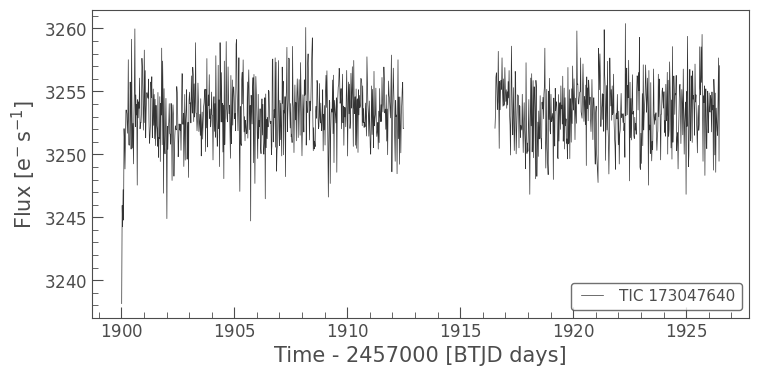

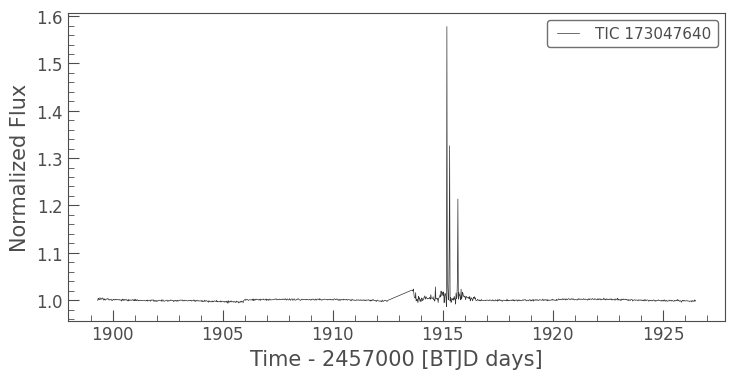

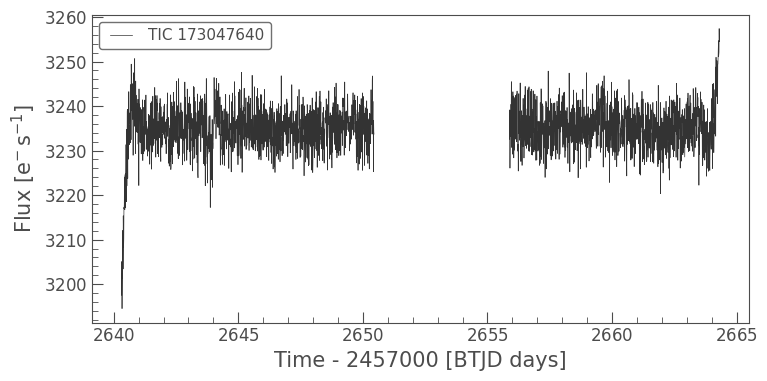

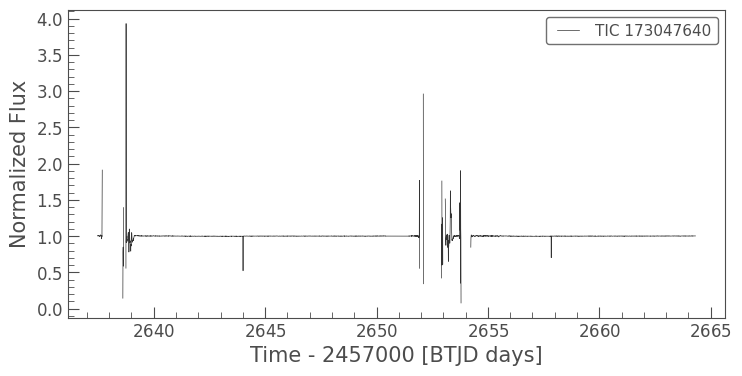

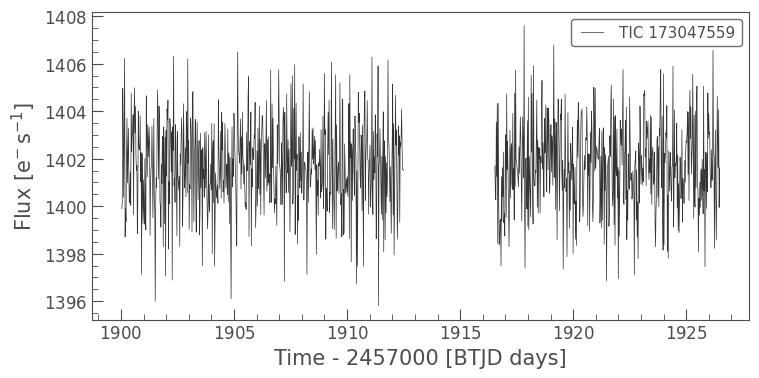

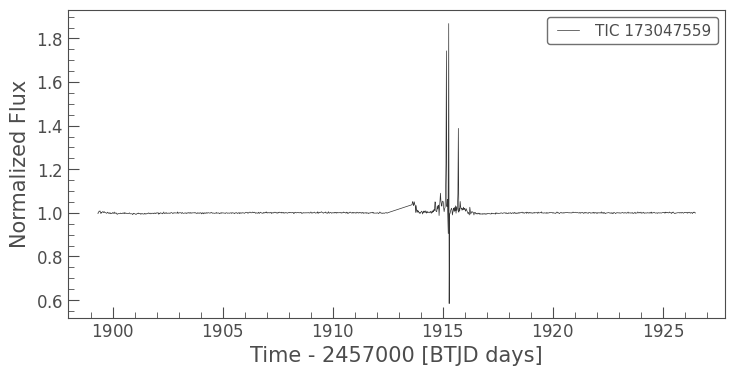

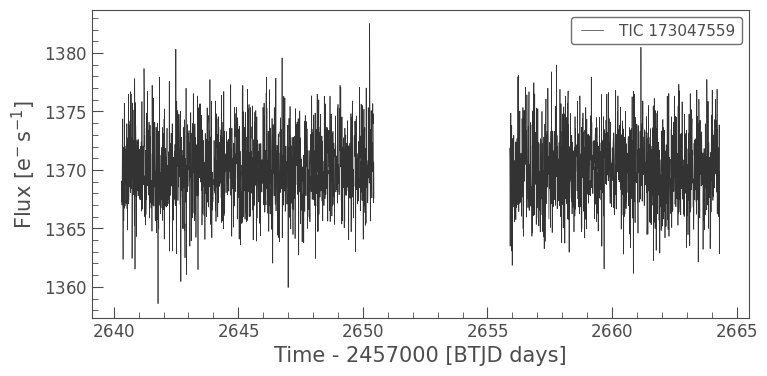

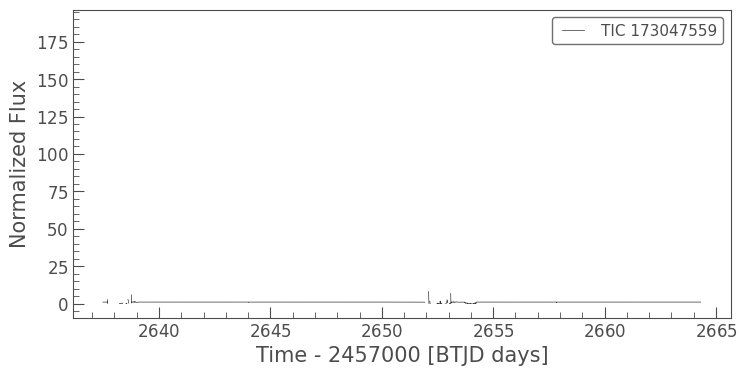

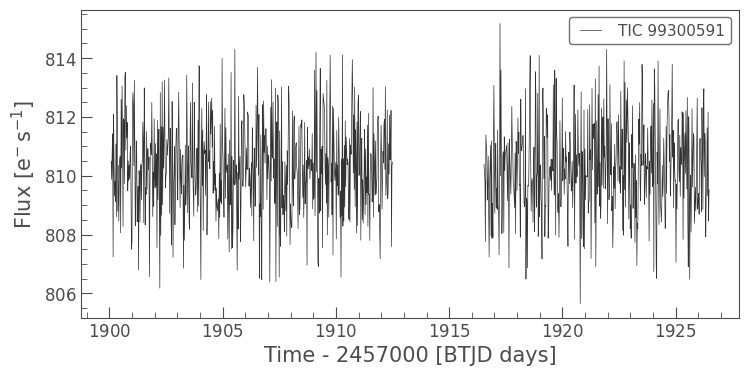

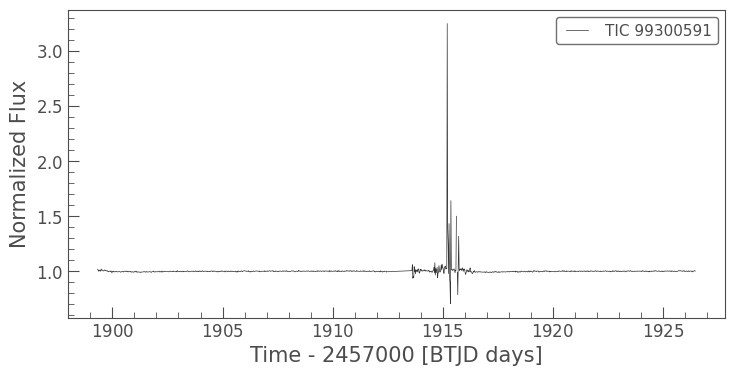

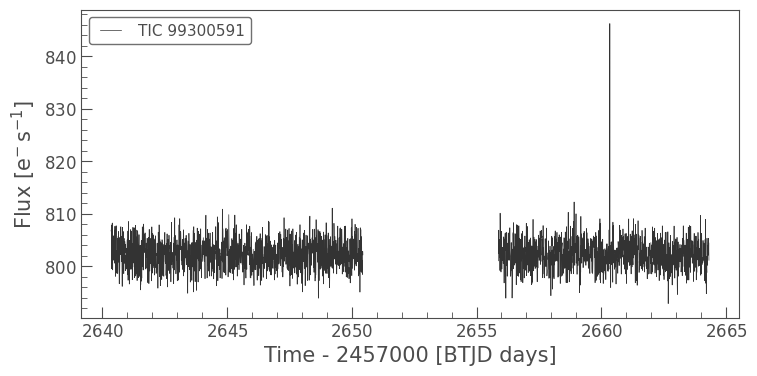

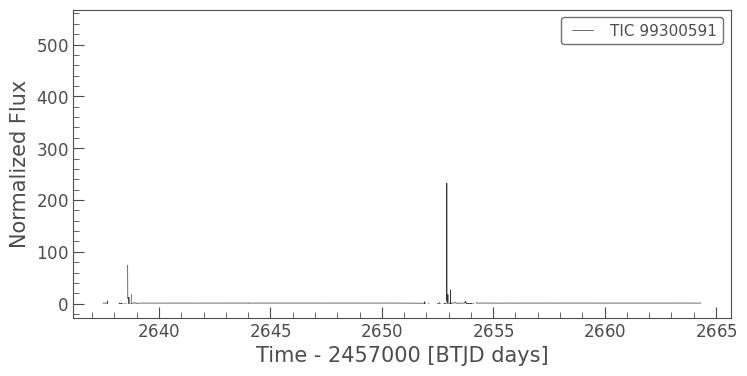

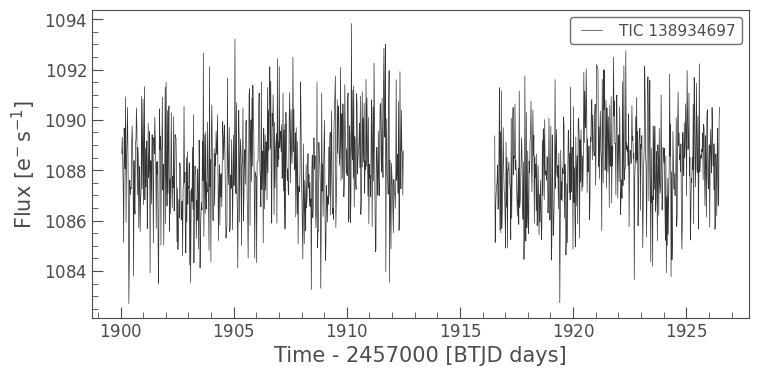

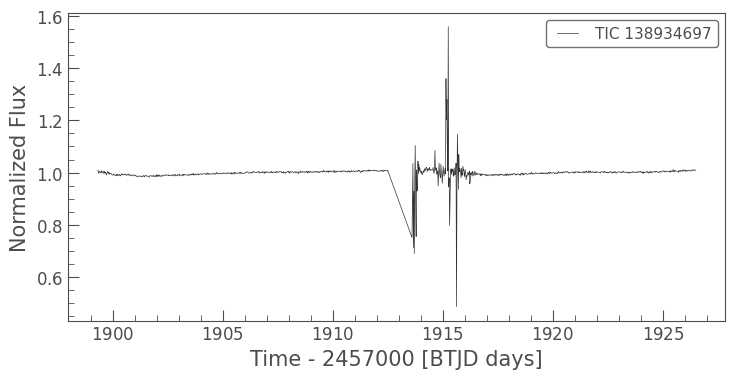

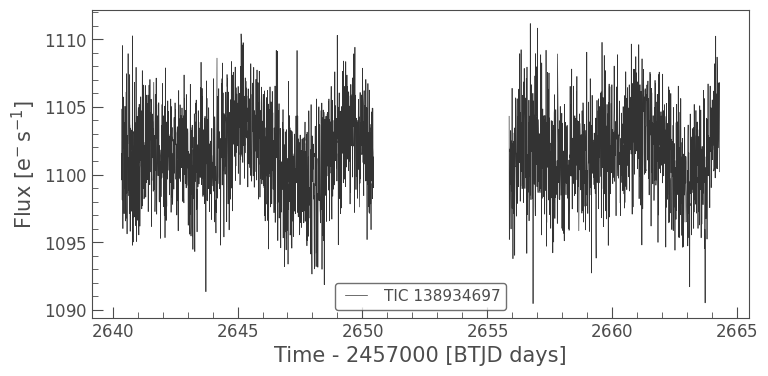

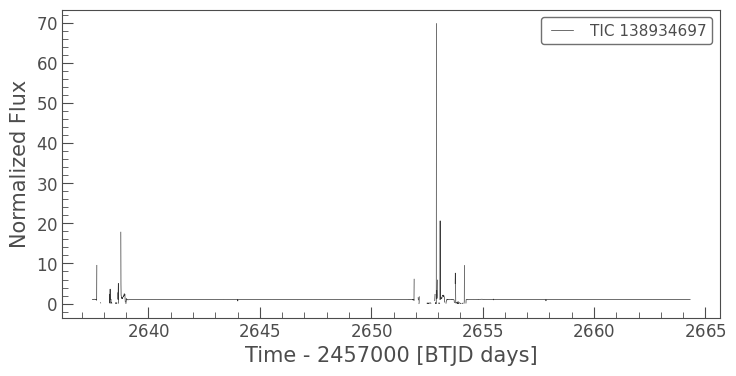

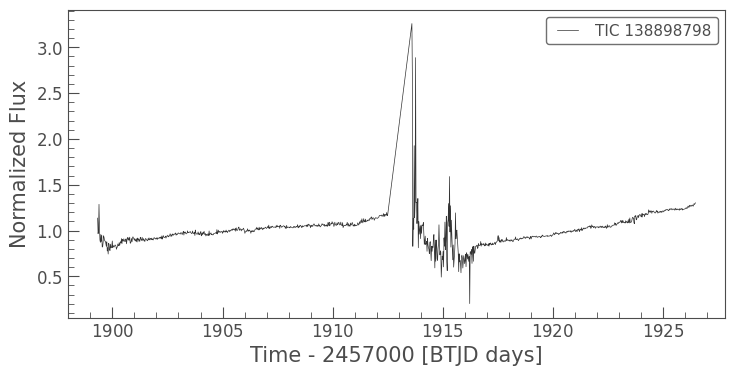

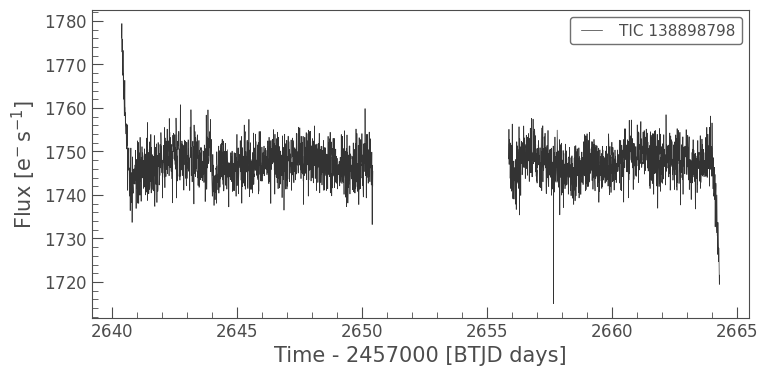

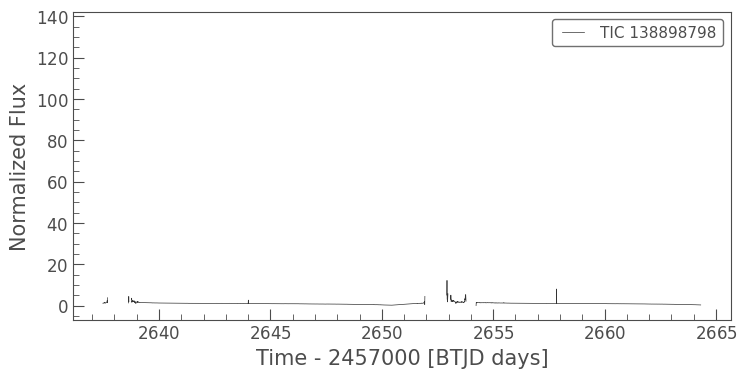

In [28]:
# Solutions
# Any of the stars identified in Exercise 3 with G magnitudes of 4-6 are on the main sequence. 
# In these solutions, we'll show a few different ones to demonstrate
# some of the things you'll see in lightcurves.
# Note that some of the targets will have multiple lightcurves.
totry=((cat2['HasLC']==True) & (cat2['abs_gaia']>4))
print(np.sum(totry),' stars are good targets to try.')
indices=np.where(totry)[0]
# Let's look at 5, randomly chosen.
for i in [0,20,40,60,80]:
    search_result=lk.search_lightcurve('TIC'+cat2[indices[i]]['ID'])
    lc_collection=search_result.download_all()
    for lc in lc_collection:
        lc.plot()

When the same patterns appear in both halves of a sector, it's likely an instrumental effect, not an astrophysical one. Don't be surprised if you didn't easily find an exoplanet transit.

## Exercise 5

Plot the HR diagrams of the NGC2362 and M67 star clusters, on the same plot. Qualitatively, which cluster is older? How do you know? More details: You'll want to look up information about the angular size of each cluster, in order to choose a correct search radius. Also make sure to only include search results in the correct distance range. On your plot, represent the clusters with two different colors and shapes. Include a plot legend.

In [45]:
# Solution
# Cluster 1, NGC2362
# Note that we can search by common names which can be resolved into coordinates.
c1name='NGC2362'
c1=Catalogs.query_region(c1name, radius=5*u.arcmin, catalog="Tic")
# Restrict to the right-ish range of distance in pc.
c1=c1[(c1['d']>1000) & (c1['d']<2000)]

# Do the same filtering as we did in the notebook.
c1 = c1[(c1['e_d'] / c1['d'] < 0.1)]
c1['abs_gaia'] = c1['GAIAmag'] - 5 * np.log10(c1['d'] / 10)
c1['color'] = c1['gaiabp'] - c1['gaiarp']
c1=c1[~np.isnan(c1['color'])]
c1=c1[~np.isnan(c1['abs_gaia'])]

In [48]:
# Cluster 2, M67
# Note that we can search by common names which can be resolved into coordinates.
c2name='M67'
c2=Catalogs.query_region(c2name, radius=20*u.arcmin, catalog="Tic")
# Restrict to the right-ish range of distance in pc.
c2=c2[(c2['d']>500) & (c2['d']<1500)]

# Do the same filtering as we did in the notebook.
c2 = c2[(c2['e_d'] / c2['d'] < 0.1)]
c2['abs_gaia'] = c2['GAIAmag'] - 5 * np.log10(c2['d'] / 10)
c2['color'] = c2['gaiabp'] - c2['gaiarp']
c2=c2[~np.isnan(c2['color'])]
c2=c2[~np.isnan(c2['abs_gaia'])]

In [51]:
# Initialize Bokeh
output_notebook()

Loading BokehJS ...

In [53]:
# Setup two separate source dictionaries, one for each cluster.
source1 = ColumnDataSource(
    data=dict(
        x=list(c1['color']),
        y=list(c1['abs_gaia']),
        tic=list(c1['ID'])
    )
)

source2 = ColumnDataSource(
    data=dict(
        x=list(c2['color']),
        y=list(c2['abs_gaia']),
        tic=list(c2['ID'])
    )
)

plot_title='Comparison of Two Clusters'
id_hover_tool = HoverTool(tooltips=[('TIC','@tic'),('Gb-Gr','@x'),('Abs G','@y')])
p = figure(title=plot_title, x_axis_label="Gb-Gr",
           y_axis_label="Absolute G")
p.circle('x', 'y', source=source1, alpha=0.6,color='blue',legend_label=c1name)
p.square('x', 'y', source=source2, alpha=0.6,color='red',legend_label=c2name)
p.y_range.flipped = True
p.add_tools(id_hover_tool)
show(p)

Based on the main-sequence turnoff point, M67 is much older than NGC2362. 